在 Keras 架構下以 ResNet-50 預訓練模型為基礎，建立可用來辨識狗與貓，並在雲端上執行

# 準備資料及設定環境

## 設定環境

In [1]:
# 查看 GPU
!nvidia-smi

Thu May 26 08:34:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# 設定連結 Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 準備資料

### 下載資料集和預訓練模型 (雲端需執行，Google Drive不需重複執行)

In [3]:
from IPython.display import clear_output
!git clone https://github.com/AI-FREE-Team/Kaggle_dog-and-cat.git
!apt-get install unrar
!unrar x '/content/Kaggle_dog-and-cat/cat_dog_classifier.part01.rar'
clear_output(wait=True)
print('下載完成!')

下載完成!


### 解壓縮資料：雲端上執行 (需重複執行)

In [4]:
import zipfile
zip_files = ['train.zip', 'test1.zip']

for zip_file in zip_files:
    with zipfile.ZipFile("/content/{}".format(zip_file),"r") as z:
        z.extractall("/content/")
        print("{} unzipped".format(zip_file))

train.zip unzipped
test1.zip unzipped


# Import Package

In [5]:
!pip install tensorflow==2.1.0
# 要按restart runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 23 kB/s 
     |████████████████████████████████| 448 kB 71.8 MB/s 
     |████████████████████████████████| 3.8 MB 57.4 MB/s 
     |████████████████████████████████| 50 kB 7.7 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=a86106af05b4df78f4527d3e1209863ad1ccd7264aea6ce5796bee8475fec616
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting un

In [6]:
try :
  %tensorflow_version 2.x
except Exception :
  pass
import tensorflow as tf

In [7]:
try:
    from PIL import Image
except ImportError:
    import Image

In [8]:
from platform import python_version

In [29]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import applications

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import glob
import os

import warnings

warnings.filterwarnings('ignore')

In [10]:
# 確認 Python 的版本
print( 'Python Version：', python_version() )
# 確認 tensorflow 的版本
print(f'tensorflow Version：{tf.__version__}')
# 確認 Image 的版本
print(f'Image Version：{Image.__version__}')

Python Version： 3.7.13
tensorflow Version：2.1.0
Image Version：7.1.2


# 整理資料

## 把train資料夾內的東西放進列表裡

In [11]:
IMAGE_FOLDER_PATH=r"/content/train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
# FILE_NAMES = []
# for i in glob.glob(IMAGE_FOLDER_PATH):
#   FILE_NAMES.append(i)
  # print(i)

FILE_NAMES

['dog.12282.jpg',
 'dog.1897.jpg',
 'cat.193.jpg',
 'dog.5458.jpg',
 'dog.5670.jpg',
 'dog.9316.jpg',
 'dog.5241.jpg',
 'dog.455.jpg',
 'dog.7228.jpg',
 'cat.1946.jpg',
 'dog.646.jpg',
 'dog.6391.jpg',
 'dog.6272.jpg',
 'cat.168.jpg',
 'dog.1799.jpg',
 'cat.9191.jpg',
 'dog.11643.jpg',
 'dog.6365.jpg',
 'dog.1839.jpg',
 'dog.3711.jpg',
 'dog.11265.jpg',
 'dog.3112.jpg',
 'dog.6199.jpg',
 'dog.7301.jpg',
 'dog.716.jpg',
 'cat.2088.jpg',
 'cat.7338.jpg',
 'cat.3899.jpg',
 'cat.6636.jpg',
 'dog.8070.jpg',
 'dog.5635.jpg',
 'dog.9732.jpg',
 'cat.2597.jpg',
 'dog.9063.jpg',
 'cat.7814.jpg',
 'dog.6850.jpg',
 'cat.12139.jpg',
 'cat.8583.jpg',
 'dog.5758.jpg',
 'cat.10950.jpg',
 'dog.869.jpg',
 'cat.5777.jpg',
 'dog.5963.jpg',
 'dog.10237.jpg',
 'dog.11909.jpg',
 'cat.7790.jpg',
 'cat.10205.jpg',
 'dog.5283.jpg',
 'cat.157.jpg',
 'dog.1023.jpg',
 'dog.6970.jpg',
 'cat.1856.jpg',
 'dog.4968.jpg',
 'cat.2812.jpg',
 'cat.5110.jpg',
 'cat.10916.jpg',
 'cat.292.jpg',
 'dog.11732.jpg',
 'cat.8837.j

## 將圖片的讀取路徑製作成Pandas表格

In [12]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)
    full_paths.append(full_path)
    targets.append(target)

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['label']=targets

In [13]:
dataset

,image_path,label
0,/content/train/dog.12282.jpg,dog
1,/content/train/dog.1897.jpg,dog
2,/content/train/cat.193.jpg,cat
3,/content/train/dog.5458.jpg,dog
4,/content/train/dog.5670.jpg,dog
...,...,...
24995,/content/train/cat.1678.jpg,cat
24996,/content/train/dog.1022.jpg,dog
24997,/content/train/dog.2038.jpg,dog
24998,/content/train/cat.3129.jpg,cat


## 計算有多少隻貓與狗在train資料集裡

In [14]:
target_counts=dataset['label'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


# 切割資料集，分成訓練集與驗證集

In [15]:
dataset_train, dataset_valid=train_test_split(dataset,
                                                 test_size=0.2,
                                                 random_state=42)
print(f'訓練集資料數 : {len(dataset_train)}')
print(f'驗證集資料數 : {len(dataset_valid)}')

訓練集資料數 : 20000
驗證集資料數 : 5000


# 資料預處理

## 參數設定：依不同模型設定

In [16]:
# 資料路徑
FOLDER_PATH = r"/content"
DATASET_PATH  = '/content/drive/My Drive/Colab Notebooks/訓練結果/'

# 影像大小
IMAGE_SIZE = (224, 224)
WIDTH = IMAGE_SIZE[0]
HEIGHT = IMAGE_SIZE[1]

# 影像類別數
NUM_CLASSES = 2

# 若 GPU 記憶體不足，可調降 batch size 或凍結更多層網路
BATCH_SIZE = 8

# 凍結網路層數
FREEZE_LAYERS = 2

# Epoch 數
NUM_EPOCHS = 20

# 模型輸出儲存的檔案
WEIGHTS_FINAL = 'dog_cat_model-cnn-final.h5'
PICTURE_FINAL = 'dog_cat_model-cnn-final.jpg'
#WEIGHTS_FINAL = 'dog_cat_model-resnet50-final.h5'
#PICTURE_FINAL = 'dog_cat_model-resnet50-final.jpg'

## Train

In [17]:
train_datagen=ImageDataGenerator(
                       rotation_range=40,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       shear_range=0.2,
                       zoom_range=0.2,
                       channel_shift_range=10,
                       horizontal_flip=True,
                       #fill_mode="nearest"
                       rescale=1./255
                       )

train_datagenerator=train_datagen.flow_from_dataframe(#FOLDER_PATH + '/train',
                                                      dataframe=dataset_train,
                                                      target_size=IMAGE_SIZE,
                                                      #interpolation="bicubic",
                                                      class_mode="categorical",
                                                      #shuffle=True, 
                                                      x_col="image_path",
                                                      y_col="label",
                                                      batch_size=BATCH_SIZE)

Found 20000 validated image filenames belonging to 2 classes.


## Test

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_datagenerator=test_datagen.flow_from_dataframe(#FOLDER_PATH + '/train',
                                                      dataframe=dataset_train,
                                                      target_size=IMAGE_SIZE,
                                                      #interpolation="bicubic",
                                                      class_mode="categorical",
                                                      #shuffle=True, 
                                                      x_col="image_path",
                                                      y_col="label",
                                                      batch_size=BATCH_SIZE)

Found 20000 validated image filenames belonging to 2 classes.


# 選擇模型

<img src="https://i.imgur.com/J4WEtxs.jpg">
<img src="https://i.imgur.com/Vjg5Lrj.jpg">

In [19]:
model=models.Sequential()
model.add(layers.Conv2D(48, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3)))  # WIDTH、HEIGHT = 150
model.add(layers.Conv2D(48, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation="sigmoid"))
model.summary() #查看模型

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 48)      1344      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 48)      20784     
_________________________________________________________________
batch_normalization (BatchNo (None, 220, 220, 48)      192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 48)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      27712     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 64)      3

## 開始訓練

* 可調整參數 epoch(訓練次數)-訓練愈久模型效度越好

In [20]:
Optimizer = 'Adam' 
# if Optimizer == 'SGD':
#   Opti = optimizers.SGD(lr=0.001)
# elif Optimizer == 'RMSprop':
#   Opti = optimizers.RMSprop
# elif Optimizer == 'Adam':
#   Opti = optimizers.Adam
model.compile(loss='binary_crossentropy', 
              optimizer=Optimizer,
              metrics=['accuracy'])
print('[INFO]: model compiled...')
print(f'optimizer : {Optimizer}')

[INFO]: model compiled...
optimizer : Adam


In [21]:
# 開始training

modelHistory1=model.fit_generator(train_datagenerator,
                                epochs=5,
                                validation_data=test_datagenerator #,
                                # validation_steps=dataset_valid.shape[0]/150,
                                # steps_per_epoch=dataset_train.shape[0]/150,
                                # callbacks = callback,
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2500 steps, validate for 2500 steps
Epoch 1/5
2500/2500 [==============================] - 387s 155ms/step - loss: 0.7868 - accuracy: 0.5603 - val_loss: 0.7086 - val_accuracy: 0.5638
Epoch 2/5
2500/2500 [==============================] - 358s 143ms/step - loss: 0.6680 - accuracy: 0.6057 - val_loss: 0.6679 - val_accuracy: 0.5898
Epoch 3/5
2500/2500 [==============================] - 358s 143ms/step - loss: 0.6689 - accuracy: 0.6064 - val_loss: 0.7794 - val_accuracy: 0.5883
Epoch 4/5
2500/2500 [==============================] - 359s 144ms/step - loss: 0.6504 - accuracy: 0.6217 - val_loss: 0.5949 - val_accuracy: 0.6953
Epoch 5/5
2500/2500 [==============================] - 358s 143ms/step - loss: 0.6335 - accuracy: 0.6497 - val_loss: 0.5666 - val_accuracy: 0.7125


## 顯示訓練結果

Train Accuracy:0.650
Valid Accuracy:0.713


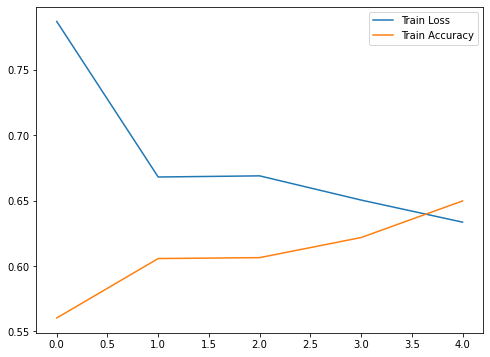

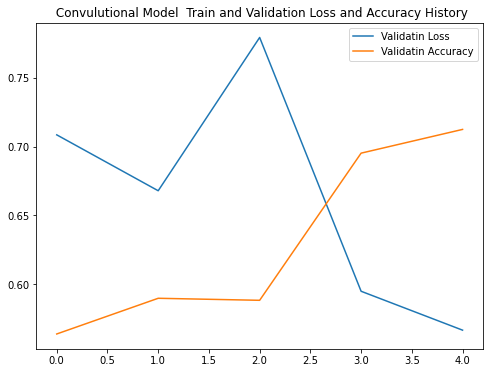

In [22]:
def show_model_history(modelHistory, model_name):
    history=pd.DataFrame()
    history_valid = pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history_valid["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history_valid["Validatin Accuracy"]=modelHistory.history['val_accuracy']

    history.plot(figsize=(8,6))
    plt.show()
    history_valid.plot(figsize=(8,6))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()


print("Train Accuracy:{:.3f}".format(modelHistory1.history['accuracy'][-1]))
print("Valid Accuracy:{:.3f}".format(modelHistory1.history['val_accuracy'][-1]))
show_model_history(modelHistory=modelHistory1, model_name="")

In [23]:
#DATASET_PATH  = '/content/drive/My Drive/Colab Notebooks/訓練結果/'
plt.savefig( os.path.join(DATASET_PATH,PICTURE_FINAL), dpi=500 )

<Figure size 432x288 with 0 Axes>

## 儲存訓練好的模型

In [24]:
#DATASET_PATH  = '/content/drive/My Drive/Colab Notebooks/訓練結果/'
# 儲存訓練好的模型
model.save(os.path.join(DATASET_PATH,WEIGHTS_FINAL))

# 模型：ResNet50

In [26]:
# 輸出各類別的索引值
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

NameError: ignored

## 開始訓練

In [ ]:
from tensorflow.python.keras.applications.resnet50 import ResNet50

In [27]:
# 以訓練好的 ResNet50 為基礎來建立模型，
# 捨棄 ResNet50 頂層的 fully connected layers
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)

# 增加 DropOut layer
x = Dropout(0.5)(x)

# 增加 Dense layer，以 softmax 產生個類別的機率值
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

# 設定凍結與要進行訓練的網路層
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

NameError: ignored

In [ ]:
# 使用 Adam optimizer，以較低的 learning rate 進行 fine-tuning
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

# 輸出整個網路結構
print(net_final.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# 訓練模型
history = net_final.fit_generator(train_batches,
                        steps_per_epoch = train_batches.samples // BATCH_SIZE,
                        validation_data = valid_batches,
                        validation_steps = valid_batches.samples // BATCH_SIZE,
                        epochs = NUM_EPOCHS)

# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 62 steps
Epoch 1/10
250/250 [==============================] - 305s 1s/step - loss: 2.1261 - accuracy: 0.4964 - val_loss: 1.7594 - val_accuracy: 0.4815
Epoch 2/10
250/250 [==============================] - 296s 1s/step - loss: 3.3283 - accuracy: 0.5024 - val_loss: 2.1602 - val_accuracy: 0.7746
Epoch 3/10
250/250 [==============================] - 294s 1s/step - loss: 3.7782 - accuracy: 0.5013 - val_loss: 13.7742 - val_accuracy: 0.9958
Epoch 4/10
250/250 [==============================] - 298s 1s/step - loss: 3.8541 - accuracy: 0.5047 - val_loss: 43.2730 - val_accuracy: 0.9984
Epoch 5/10
250/250 [==============================] - 299s 1s/step - loss: 3.8520 - accuracy: 0.5015 - val_loss: 75.8716 - val_accuracy: 0.9994
Epoch 6/10
250/250 [==============================] - 300s 1s/step - loss: 3.8639 - accuracy: 0.5013 - val_loss: 84.6443 - val_accuracy: 0.9996
Epoch 7/10
250/250 [=========================

In [ ]:
# 儲存訓練好的模型
net_final.save(WEIGHTS_FINAL)

Found 20000 validated image filenames belonging to 2 classes.


## 顯示訓練結果

In [ ]:
def show_train_history(train_A, test_A, plot_title, ylabel): #,PICTURE_ACCURACY_FINAL):
    His_Train = history.history[train_A]
    His_Test = history.history[test_A]
    plt.plot(range( len(His_Train) ), His_Train, label='Train'+"{:10.4f}".format( max(His_Train) ))
    plt.plot(range( len(His_Test) ), His_Test, label='Dev'+"{:10.4f}".format( max(His_Test) ))
    #plt.plot(history.history[test_A])
    if train_A=='accuracy' :
      plt.legend( loc='upper left' )
    elif train_A=='loss':
      plt.legend( loc='upper right' )
    else: 
      plt.legend( loc='lower left' )
    plt.title(plot_title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    #plt.xlim(0, max(len(His_Train),len(His_Test)))
    #plt.legend(['Train', 'Dev'], loc='upper left')
    #plt.show()
    #plt.savefig( PICTURE_ACCURACY_FINAL, dpi=500)

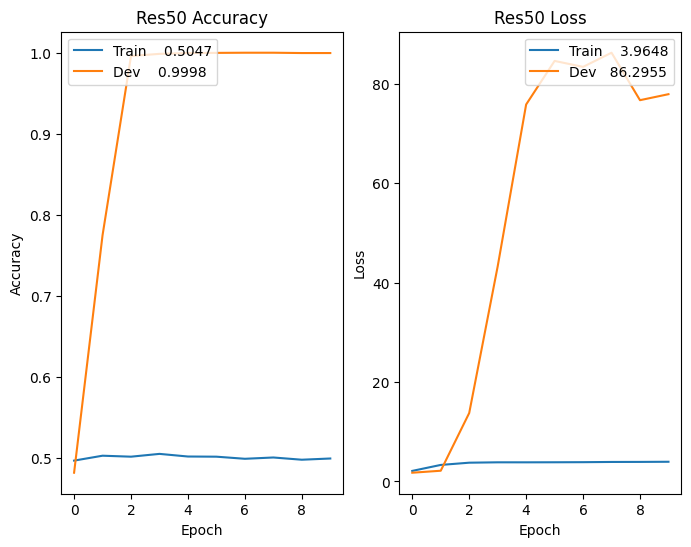

In [ ]:
#%matplotlib inline
plt.style.use( 'default' )  #還原原始設定 (檢查)
plt.figure( figsize=(8,6) )

plt.subplot( 1,2,1 )
# summarize history for accuracy
show_train_history( 'accuracy', 'val_accuracy', 'Res50 Accuracy', 'Accuracy' )#,PICTURE_ACCURACY_FINAL)

plt.subplot( 1,2,2 )
# summarize history for loss 
show_train_history( 'loss', 'val_loss', 'Res50 Loss', 'Loss' )#,PICTURE_ACCURACY_FINAL)

# 上傳照片 Test Model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [ ]:
model_type = 'own-model' 

if model_type == 'pre-trained':
  model=applications.VGG16(weights="imagenet", include_top=False, input_shape=(WIDTH, HEIGHT, 3))
  print('你使用的是 AI-FreeTeam 的 pre-trained Model')
else:
  model = load_model('/content/model-resnet50-final.h5')
  print('你正在使用自己設計的Model')
model.summary()

你正在使用自己設計的Model
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________

In [ ]:
from google.colab import files
uploaded = files.upload()

from google.colab.patches import cv2_imshow
x = ''
for i in uploaded:
  x = i
predict_img = '/content/test1/' + x
img = load_img(predict_img, target_size=(WIDTH, HEIGHT))
img = img_to_array(img)
img = np.expand_dims(img, axis=0)
feature=model.predict(img)
feature = feature.reshape(1,-1)
import cv2
ig = cv2.imread(predict_img,1)
cv2_imshow(ig)

In [ ]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import load_model
from tensorflow.python.keras.preprocessing import image
import sys
import numpy as np

In [ ]:
# 從參數讀取圖檔路徑
#files = sys.argv[1:]
files = os.listdir('/content/test1')

# 載入訓練好的模型
net = load_model('model-resnet50-final.h5')

cls_list = ['cats', 'dogs']

# 辨識每一張圖
for f in files:
    img = image.load_img(f, target_size=(224, 224))
    if img is None:
        continue
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    pred = net.predict(x)[0]
    top_inds = pred.argsort()[::-1][:5]
    print(f)
    for i in top_inds:
        print('    {:.3f}  {}'.format(pred[i], cls_list[i]))

FileNotFoundError: ignored

# 結果
* VGG16 模型準確率大約為 94%
* ResNet50 模型為基礎，將輸入影像尺寸提高為 224×224，加上大量的 data augmentation，可讓辨識的準確率達到 99%

# 參考資料
* [用簡單的CNN模型訓練模型建立貓貓狗狗辨識程式](https://medium.com/bandai%E7%9A%84%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98/%E6%89%8B%E6%8A%8A%E6%89%8B%E7%A8%8B%E5%BC%8F%E5%AF%A6%E4%BD%9C%E5%88%86%E4%BA%AB%E7%B3%BB%E5%88%97-%E7%94%A8%E7%B0%A1%E5%96%AE%E7%9A%84cnn%E6%A8%A1%E5%9E%8B%E8%A8%93%E7%B7%B4%E6%A8%A1%E5%9E%8B%E5%BB%BA%E7%AB%8B%E8%B2%93%E8%B2%93%E7%8B%97%E7%8B%97%E8%BE%A8%E8%AD%98%E7%A8%8B%E5%BC%8F-c290252bad4)
* [Keras 以 ResNet-50 預訓練模型建立狗與貓辨識程式](https://blog.gtwang.org/programming/keras-resnet-50-pre-trained-model-build-dogs-cats-image-classification-system/)